In [325]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm
import pandas as pd

In [326]:
t = np.arange(0,2.4,2e-4)
e= 0.205630
a=0.387098
G=4*np.pi**2
alpha=1.1*10**-8

In [327]:
def aceleracion(r):
    d = np.linalg.norm(r)
    return -r* (G/d**3)*(1 + alpha/d**2)

In [328]:
def Verlet(p0,t):
    
    h = t[1]-t[0]
    r0 = p0[0]
    v0 = p0[1]
    a0 = aceleracion(r0)
    r = np.zeros( (len(t),len(r0)) )
    v = np.zeros_like(R)
    a = np.zeros_like(R)
    r[0] = r0
    v[0] = v0
    a[0] = a0
           
    for i in tqdm(range(0,len(t)-1)):
        r[i+1] = r[i] + v[i]*h + 0.5*a[i]*h**2
        a[i+1] = aceleracion(r[i+1])
        v[i+1] = v[i] + 0.5*h*(a[i]+a[i+1])
    
    return r,a,v

In [329]:
r0 = np.array([np.array([a*(1 + e), 0.]), np.array([0., (G*(1 - e)/(a*(1 + e)))**0.5])])

In [330]:
r,a,v = Verlet(r0,t)

100%|██████████| 11999/11999 [00:00<00:00, 28177.90it/s]


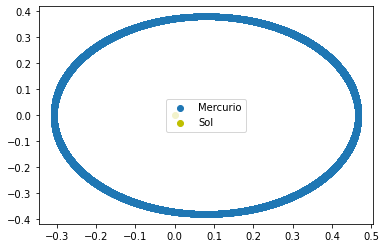

In [331]:
plt.scatter(r[:,0],r[:,1],label='Mercurio')
plt.scatter(0,0,color="y",label='Sol')
plt.legend()

In [332]:
d = np.linalg.norm(r,axis=1)
perihelio = []
theta = []

for i in tqdm(range(1,len(d)-1)):
    if d[i] < d[i-1] and d[i] < d[i+1]:
        perihelio.append(t[i])
        ang = np.rad2deg(np.arctan2(r[i][1],r[i][0]))
        theta.append(np.abs(ang))

100%|██████████| 11998/11998 [00:00<00:00, 886097.68it/s]


In [333]:
save = pd.DataFrame({"Tiempo":perihelio,"Angulo":theta})
save.to_csv('Mercurio_Datos.csv', index=False)

In [342]:
dif_angulo = [theta[0]]
for i in range(len(theta)-1):
    dif_angulo.append(theta[i]-theta[0])

In [343]:
def GetFit(x,y,n=1):
    
    l = len(x)
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [341]:
len(dif_angulo)
len(perihelio)

10

In [347]:
perihelio

[0.12040000000000001,
 0.3612,
 0.6022000000000001,
 0.8430000000000001,
 1.0838,
 1.3246,
 1.5654000000000001,
 1.8064,
 2.0472,
 2.2880000000000003]

In [345]:
n = 1
param = GetFit(np.array(perihelio),np.array(dif_angulo),n)
param 
param

array([ 67.03774466, -40.77855881])

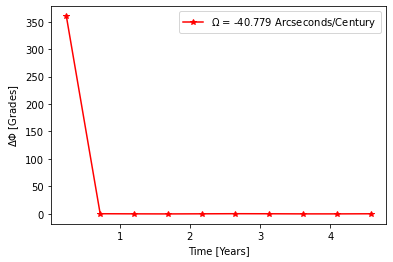

In [346]:
plt.plot(2*np.array(perihelio),2*np.array(dif_angulo),marker="*",color="r",
         label="$\Omega$ = {:.3f} Arcseconds/Century".format(param[1]))
plt.xlabel("Time [Years]")
plt.ylabel("$\Delta \Phi$ [Grades]")
plt.legend()